In [112]:
import pandas as pd
data=pd.read_csv('ign.csv')
data=pd.DataFrame(data)
data=data.drop(['Unnamed: 0','title','url'],1)

In [113]:
data.head()

,score_phrase,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,iPad,8.5,Puzzle,N,2012,9,12
3,Great,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,PlayStation 3,8.5,Sports,N,2012,9,11


In [114]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
categorical=['score_phrase','platform','genre','editors_choice']

In [115]:
for var in categorical:
    lb = LabelEncoder()
    full_var_data =data[var].astype('str')
    temp = lb.fit_transform(np.array(full_var_data))
    data[var] = lb.transform(np.array(data[var] ).astype('str'))
   

In [116]:
data.head()

,score_phrase,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,35,9.0,63,1,2012,9,12
1,0,35,9.0,63,1,2012,9,12
2,5,56,8.5,68,0,2012,9,12
3,5,54,8.5,93,0,2012,9,11
4,5,32,8.5,93,0,2012,9,11


In [133]:
print(data.editors_choice.value_counts())
print(data.release_month.value_counts())


0    15108
1     3517
Name: editors_choice, dtype: int64
11    2657
10    2310
9     1707
3     1573
12    1505
6     1483
8     1338
2     1327
4     1264
7     1190
5     1143
1     1128
Name: release_month, dtype: int64


In [131]:
def getCountVar(compute_df, count_df, var_name):
        grouped_df = count_df.groupby(var_name)
        count_dict = {}
        for name, group in grouped_df:
                count_dict[name] = group.shape[0]

        count_list = []
        for index, row in compute_df.iterrows():
                name = row[var_name]
                count_list.append(count_dict.get(name, 0))
        return count_list

In [135]:
print("Getting count features..")
data["platform_Count"] = getCountVar(data, data,"platform")
data["platform_Count"] = getCountVar(data,data, "platform")
print ("Platform", np.unique(data["platform_Count"]))

data["release_month_Count"] = getCountVar(data, data,"release_month")
data["release_month_Count"] = getCountVar(data,data, "release_month")
print ("release_month", np.unique(data["release_month_Count"]))

Getting count features..
Platform [   1    2    3    4    5    6    7   10   11   13   14   16   17   22   30
   31   33   39   40   49   58   81   82   99  114  155  208  225  254  277
  286  302  356  509  623  633  821  842  910  952 1045 1356 1366 1631 1686
 3370]
release_month [1128 1143 1190 1264 1327 1338 1483 1505 1573 1707 2310 2657]


In [136]:
data.head()

,score_phrase,platform,score,genre,editors_choice,release_year,release_month,release_day,platform_Count,release_month_Count
0,0,35,9.0,63,1,2012,9,12,155,1707
1,0,35,9.0,63,1,2012,9,12,155,1707
2,5,56,8.5,68,0,2012,9,12,99,1707
3,5,54,8.5,93,0,2012,9,11,1631,1707
4,5,32,8.5,93,0,2012,9,11,1356,1707


In [137]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

train,test=train_test_split(data,train_size=0.8)
y_train=train.editors_choice
y_test=test.editors_choice

X_train=train.drop('editors_choice',1)
X_test=test.drop('editors_choice',1)

from sklearn.linear_model import LogisticRegression
cv = cross_validation.KFold(len(X_train), n_folds=5)


In [138]:
from sklearn.metrics import accuracy_score

In [139]:
from sklearn.metrics import confusion_matrix


In [140]:
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
y=data.editors_choice
X=data.drop('editors_choice',1)

In [141]:

model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
result = grid_search.fit(X,y)
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
    stdev = scores.std()
    means.append(mean_score)
    stdevs.append(stdev)
    print("%f (%f) with: %r" % (mean_score, stdev, params))

Best: 0.912872 using {'learning_rate': 0.2}
0.880648 (0.008049) with: {'learning_rate': 0.0001}
0.889223 (0.006308) with: {'learning_rate': 0.001}
0.889182 (0.004902) with: {'learning_rate': 0.01}
0.912095 (0.004691) with: {'learning_rate': 0.1}
0.912872 (0.003930) with: {'learning_rate': 0.2}
0.911166 (0.004324) with: {'learning_rate': 0.3}


In [142]:
model=XGBClassifier(learning_rate=0.2)

In [143]:
for traincv, testcv in cv:
    model.fit(X_train.iloc[traincv],y_train.iloc[traincv])

In [144]:
y_XGB=model.predict(X_test)

In [145]:
accuracy_score(y_test, y_XGB)

0.96885906040268455

In [146]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp=confusion_matrix(y_test, y_XGB).ravel()


from sklearn.metrics import classification_report

target_names = ['N', 'Y']
print(classification_report(y_test, y_XGB, target_names=target_names))
            


             precision    recall  f1-score   support

          N       0.99      0.98      0.98      3039
          Y       0.90      0.94      0.92       686

avg / total       0.97      0.97      0.97      3725



In [147]:
from xgboost import plot_importance
from matplotlib import pyplot
print(model.feature_importances_)


[ 0.          0.12746859  0.26391381  0.09156194  0.20466787  0.05924596
  0.08976661  0.12028725  0.04308797]


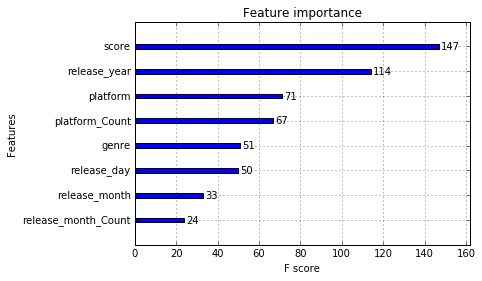

In [148]:
%matplotlib inline

import matplotlib
plot_importance(model)
pyplot.show()

In [150]:
import plotly
plotly.__version__

'1.12.9'